### Logistic Problem
To predict whether or not a patient required surgery during their ICU stay based on their lab values and vital sign measurements.

The dataset is from the MIMIC database. Our target variable will be the `require_surgery_flag` column, which equals 1 if the patient required surgery during their ICU stay. The other variables will be used as predictors.

Go through the following steps.

1. Load the dataset "MIMIC_Data_small.csv" into a dataframe. Set y = 'require_surgery_flag' and X = remaining columns.
2. Split the data into train and test sets (80/20) with `random_state=42`
3. Determine what is the "baseline" probability of requiring surgery in the ICU (looking only at the training set).
4. We want to understand the relationship between the predictors and the target (looking only at the training set). Let's start with `resprate_mean`. What is the (empirical) probability of requiring surgery for patients with `resprate_mean` between 30 and 32? What about between 16 and 18? Between 6 and 12? What does this info tell you?
5. Try to use the `hist` function to get bin counts and plot how the empirical probability changes with the value of `resprate_mean`.  Then do it for the other predictor variables. (Hint: see code snippet below)
6. Before doing any logistic regression, guess which predictor variable you think will yield the best (single predictor) logistic regression model. Then run 6 logistic regression models - one for each variable. Was your prediction right?  Use the `log_loss` function in `sklearn.metrics` to measure model performance (the closer to 0, the better).
7. Fit a logistic regression model using all of the variables. What is the `log_loss`?

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**1. Import the data**

In [6]:
df = pd.read_csv('MIMIC_Data_small.csv')

In [7]:
df.head()

,resprate_mean,bun_min,tempc_mean,spo2_min,diasbp_mean,sodium_max,require_surgery_flag
0,14.369565,16,37.049383,95.0,79.525000,140.0,1
1,15.320000,13,36.653534,94.0,66.000000,140.0,0
2,15.404762,18,36.545714,95.0,54.500000,143.0,0
3,16.677419,13,37.033333,92.0,47.933333,141.0,0
4,22.241379,25,37.333334,89.0,48.428571,143.0,0


In [25]:
y = df['require_surgery_flag']
x = df.drop('require_surgery_flag',axis = 1)

**2. Split the dataset into train/test**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=42)

**3. "Baseline" rate of surgery**

In [31]:
np.mean(y_train)

0.1077856843867727

**4. Resprate_mean relationship with target**

In [51]:
resp_mask_1 = (X_train['resprate_mean'] >= 30) & (X_train['resprate_mean'] <= 32)
resp_mask_2 = (X_train['resprate_mean'] >= 16) & (X_train['resprate_mean'] <= 18)
resp_mask_3 = (X_train['resprate_mean'] >= 6) & (X_train['resprate_mean'] <= 12)

In [52]:
print(np.mean(y_train[resp_mask_1]))
print(np.mean(y_train[resp_mask_2]))
print(np.mean(y_train[resp_mask_3]))

0.3746130030959752
0.08202212973302203
0.10816326530612246


**5. Hist Bin Count**

<ipython-input-46-cb0b71d541fa>:5: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))


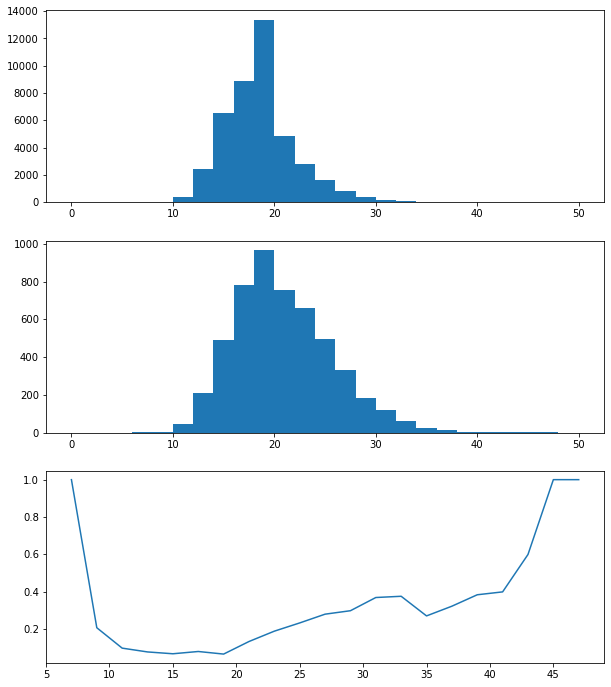

In [46]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'resprate_mean'], bins=25, range=(0,50))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'resprate_mean'], bins=25, range=(0,50))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))


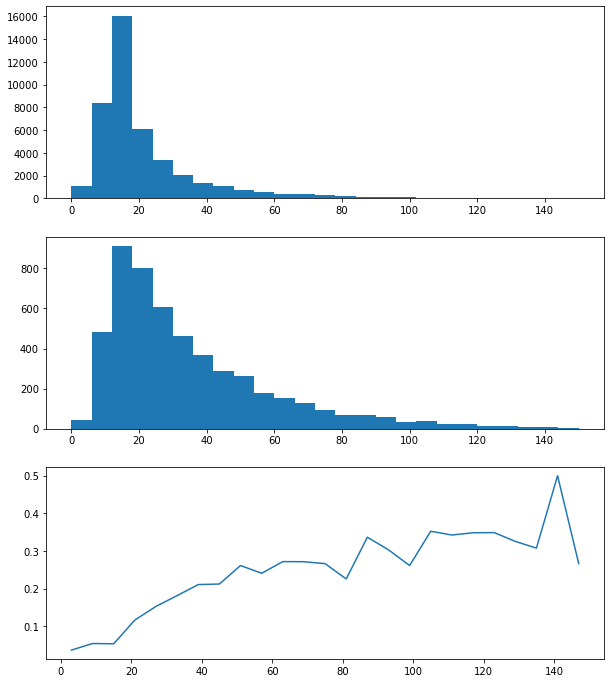

In [54]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'bun_min'], bins=25, range=(0,150))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'bun_min'], bins=25, range=(0,150))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

<ipython-input-56-33aa1172b0ed>:5: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))


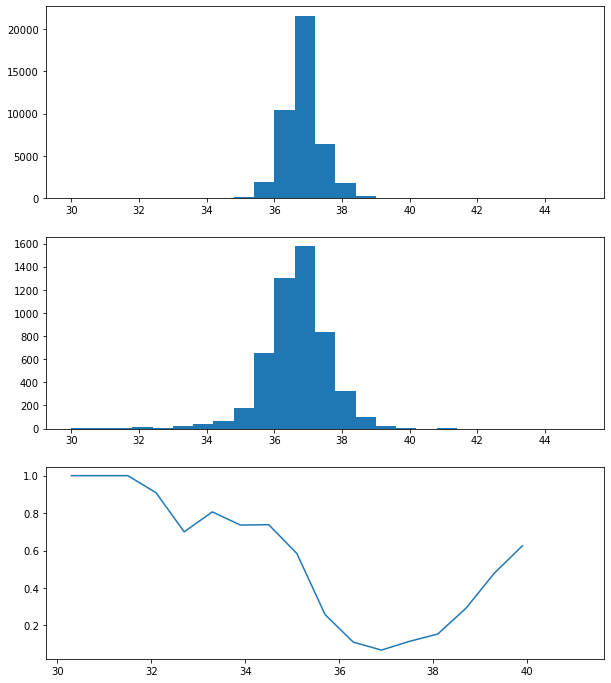

In [56]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'tempc_mean'], bins=25, range=(30,45))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'tempc_mean'], bins=25, range=(30,45))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

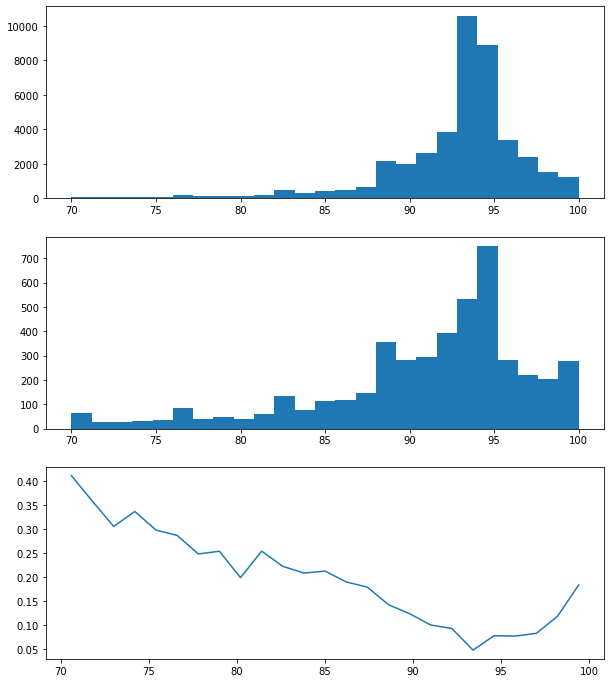

In [57]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'spo2_min'], bins=25, range=(70,100))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'spo2_min'], bins=25, range=(70,100))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

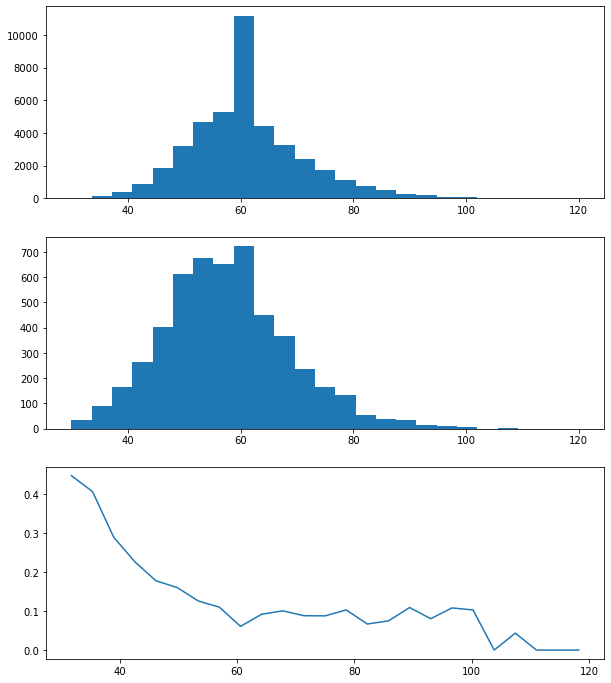

In [59]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'diasbp_mean'], bins=25, range=(30,120))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'diasbp_mean'], bins=25, range=(30,120))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

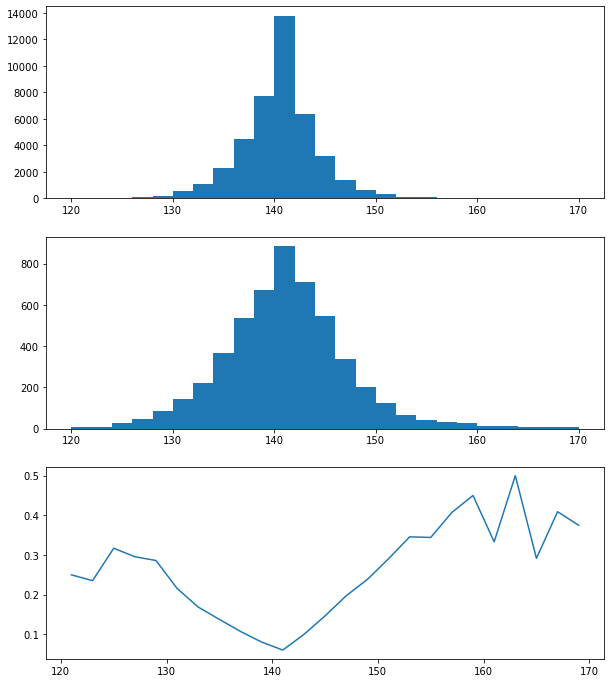

In [60]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'sodium_max'], bins=25, range=(120,170))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'sodium_max'], bins=25, range=(120,170))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

6. Single variable predictions

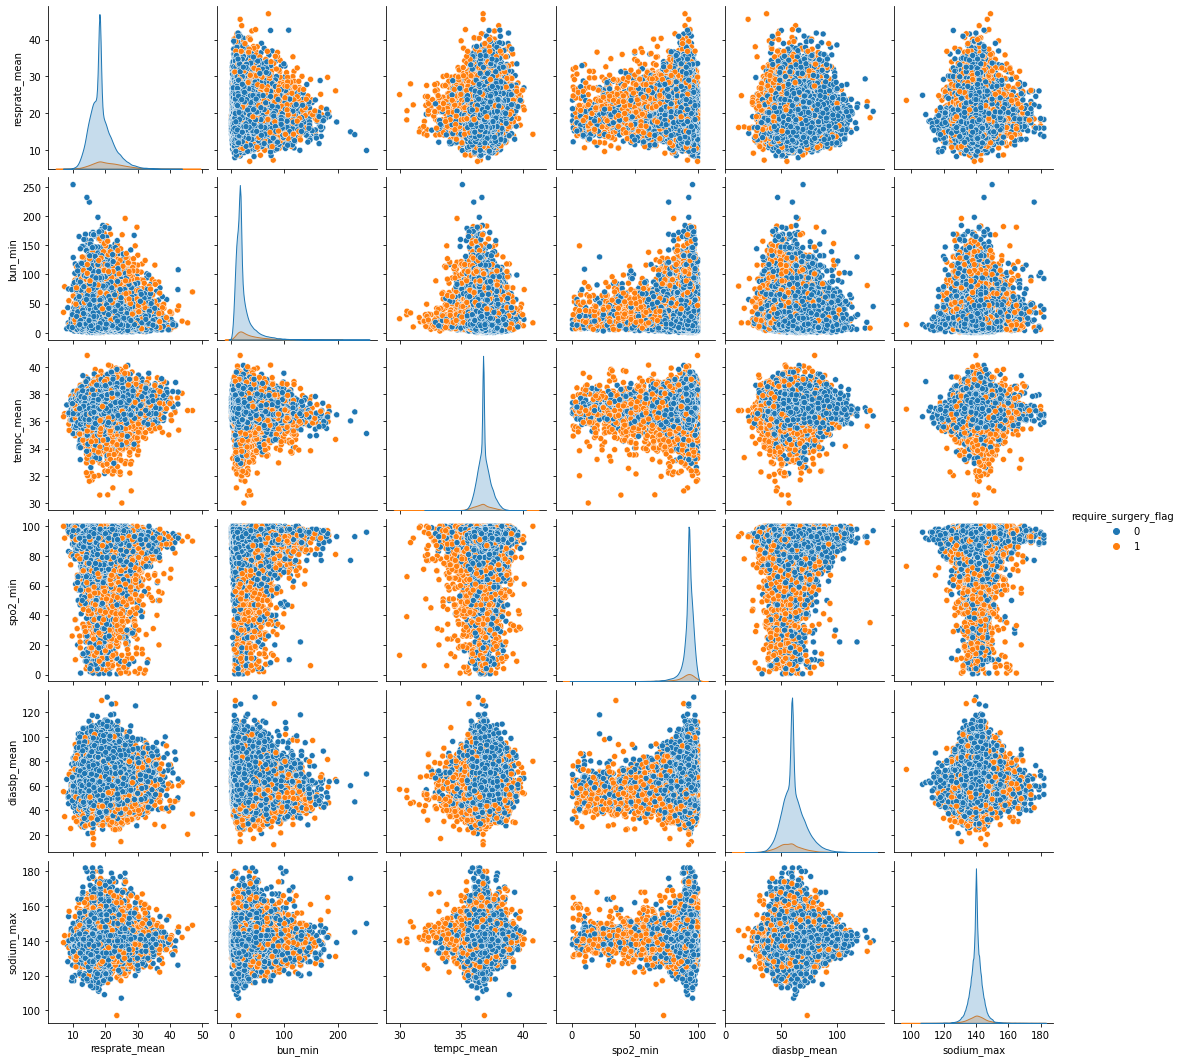

In [64]:
sns.pairplot(df,hue = 'require_surgery_flag')

**6. 6 different regression models**

In [73]:
for col in X_train.columns:
    print(col)
    X_tr = X_train[[col]]
    X_te = X_test[[col]]
    lr_model = LogisticRegression()
    lr_model.fit(X_tr,y_train)
    y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
    print(log_loss(y_test,y_prob_pred_test))

resprate_mean
0.3359603718942489
bun_min
0.3310496249649075
tempc_mean
0.34762290456701794
spo2_min
0.3352811995140327
diasbp_mean
0.3466805016477985
sodium_max
0.3530797404761448


**7. Final Regression Model**

In [88]:
lr = LogisticRegression(C=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1000)

In [63]:
print(lr.score(X_train,y_train))
y_prob_pred_test = lr.predict_proba(X_test)[:,1]

0.895039765592298


In [67]:
log_loss(y_test,y_prob_pred_test)

0.30324249493897265

In [86]:
baseline_prob = np.mean(y_train)
baseline_y_pred = [baseline_prob for _ in range(len(y_test))]
avg_logloss = log_loss(y_test, baseline_y_pred)

avg_logloss

0.35201477744872833

**8. Confusion matrix**

In [76]:
confusion_matrix(y_test, lr.predict(X_test))

array([[10524,    77],
       [ 1215,   130]])

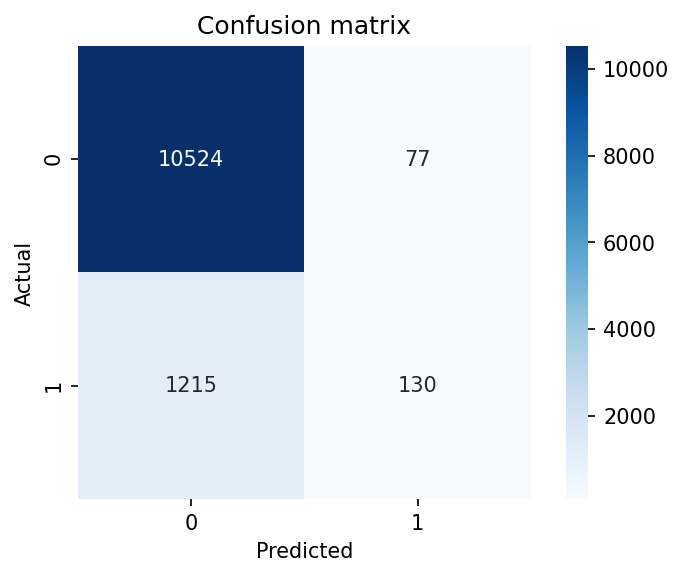

In [101]:
plt.figure(dpi=150)
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), cmap=plt.cm.Blues, annot=True, square=True, fmt='.5g')

#plt.xticklabel_format(style='plain')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix');